<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/Homeworks/HW12_Azzarano_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nick Azzarano
<br/>
CSCI 335
<br/>
Anton Selitskiy
<br/>
April 28, 2025

# Homework 12 (20pt)

Submit both training and detection files with saved model weights and the test images in one
archived file or as separate files.

### Q1 (1pt) Download MNIST dataset

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [4]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: mnist_png/valid/4/8664.png  
  inflating: mnist_png/valid/4/8675.png  
  inflating: mnist_png/valid/4/8685.png  
  inflating: mnist_png/valid/4/8695.png  
  inflating: mnist_png/valid/4/8709.png  
  inflating: mnist_png/valid/4/8743.png  
  inflating: mnist_png/valid/4/8754.png  
  inflating: mnist_png/valid/4/8755.png  
  inflating: mnist_png/valid/4/8757.png  
  inflating: mnist_png/valid/4/8770.png  
  inflating: mnist_png/valid/4/8773.png  
  inflating: mnist_png/valid/4/8775.png  
  inflating: mnist_png/valid/4/8790.png  
  inflating: mnist_png/valid/4/8797.png  
  inflating: mnist_png/valid/4/8802.png  
  inflating: mnist_png/valid/4/881.png  
  inflating: mnist_png/valid/4/8812.png  
  inflating: mnist_png/valid/4/8822.png  
  inflating: mnist_png/valid/4/8829.png  
  inflating: mnist_png/valid/4/8832.png  
  inflating: mnist_png/valid/4/8836.png  
  inflating: mnist_png/valid/4/8861.png  
  inflating: mnist_png/val

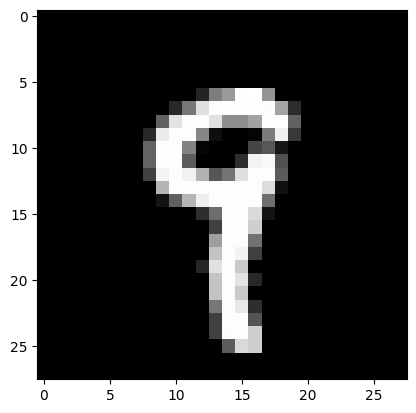

In [5]:
im = read_image('mnist_png/valid/9/9497.png')
plt.imshow(im.permute(1, 2, 0)/255, cmap='gray')

In [7]:
root_dir = 'mnist_png'

### Q2 (2pt) Create Train and Validation Dataset and DataLoader objects

In [8]:
import pathlib

In [9]:
class MNIST_dataset(Dataset):
  def __init__(self, path_to_data):
    super().__init__()
    self.path_to_data = pathlib.Path(path_to_data)
    self.paths = list(self.path_to_data.rglob('*.png'))

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
     return read_image(self.paths[index].as_posix()).squeeze(dim=0)/255, \
        torch.tensor(int(self.paths[index].as_posix().split('/')[-2]))

In [10]:
train_data = MNIST_dataset(root_dir)

In [11]:
val_data = MNIST_dataset(root_dir+'/valid')

In [12]:
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)
valid_data_loader = DataLoader(val_data, batch_size=64, shuffle=False, drop_last=True)

### Q3 (6pt) Define the model as in the image below. Convolution stands for: Conv2d with kernel size 5, stride 1 and padding 2, BatchNorm2d, and ReLU. Subsampling is MaxPool2d. I didn’t use activation after the last max-poolong.
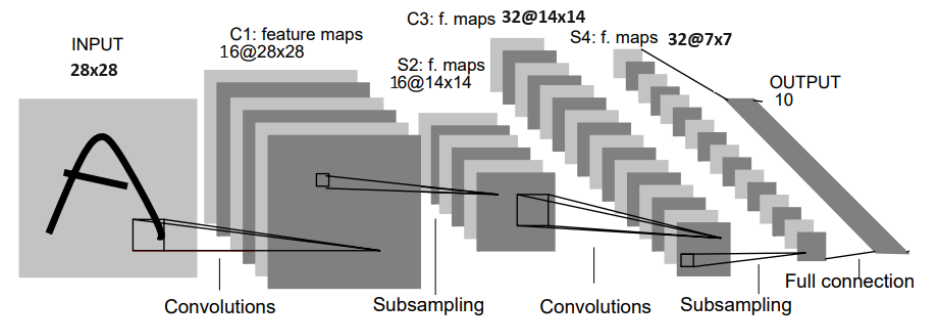

In [13]:
import torch.nn as nn
from torch.optim import Adam

In [14]:
class MyCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(MyCNN, self).__init__()

        # First convolution block
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        # First max pooling
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolution block
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        # Second max pooling
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # After second pooling, feature map size = 32@7x7
        # Fully connected layers
        self.fc = nn.Linear(32 * 7 * 7, num_classes)

    def forward(self, x):
        x = self.conv1(x)  # C1: 16@28x28
        x = self.pool1(x)  # S2: 16@14x14
        x = self.conv2(x)  # C3: 32@14x14
        x = self.pool2(x)  # S4: 32@7x7

        x = x.view(x.size(0), -1)  # Flatten

        x = self.fc(x)  # Fully connected output
        return x

### Q4 (5pt) Write the training loop. Use accuracy as the metric on the Validation set. You can use early stopping or just observe the validation curve

### Q5 (5pt) Write a Python script that can be run on the input image and returns the prediction of the handwritten digit.

### Q6 (1pt)  Run your script on the images from HW 11. Comment on the performance in the notebook or Python script.
